In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)


In [7]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df1.shape

(13320, 9)

In [16]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_12040\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [23]:
df3 [df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [26]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [32]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
def convert_soft_to_min(x):
    tokens=x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1])) /2
    try:
        return float(x)
    except:
        return None
    
        

In [15]:
convert_soft_to_min('1195 - 1440')

1317.5

In [17]:
df4=df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_soft_to_min)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [18]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [43]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [19]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
len(df5.location.unique())

1304

In [50]:
df5.location=df5.location.apply(lambda x: x.strip())

location_stats=df5.groupby('location')['location'] .agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [51]:
len (location_stats[location_stats<=10])

1052

In [52]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [21]:
len(df5.location.unique())

1304

In [54]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df5.location.unique())

242

In [22]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [23]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [25]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [26]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6) 
df7.shape

(9259, 7)

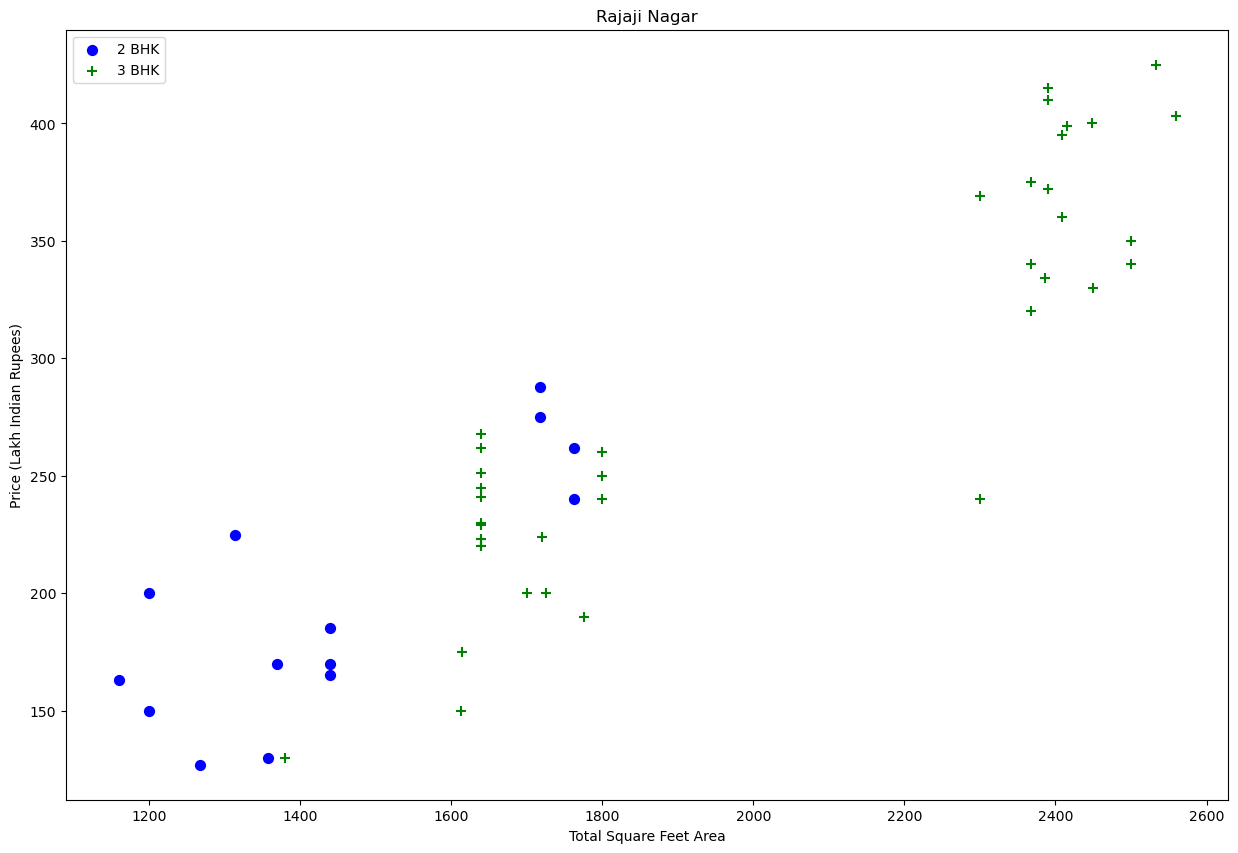

In [33]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

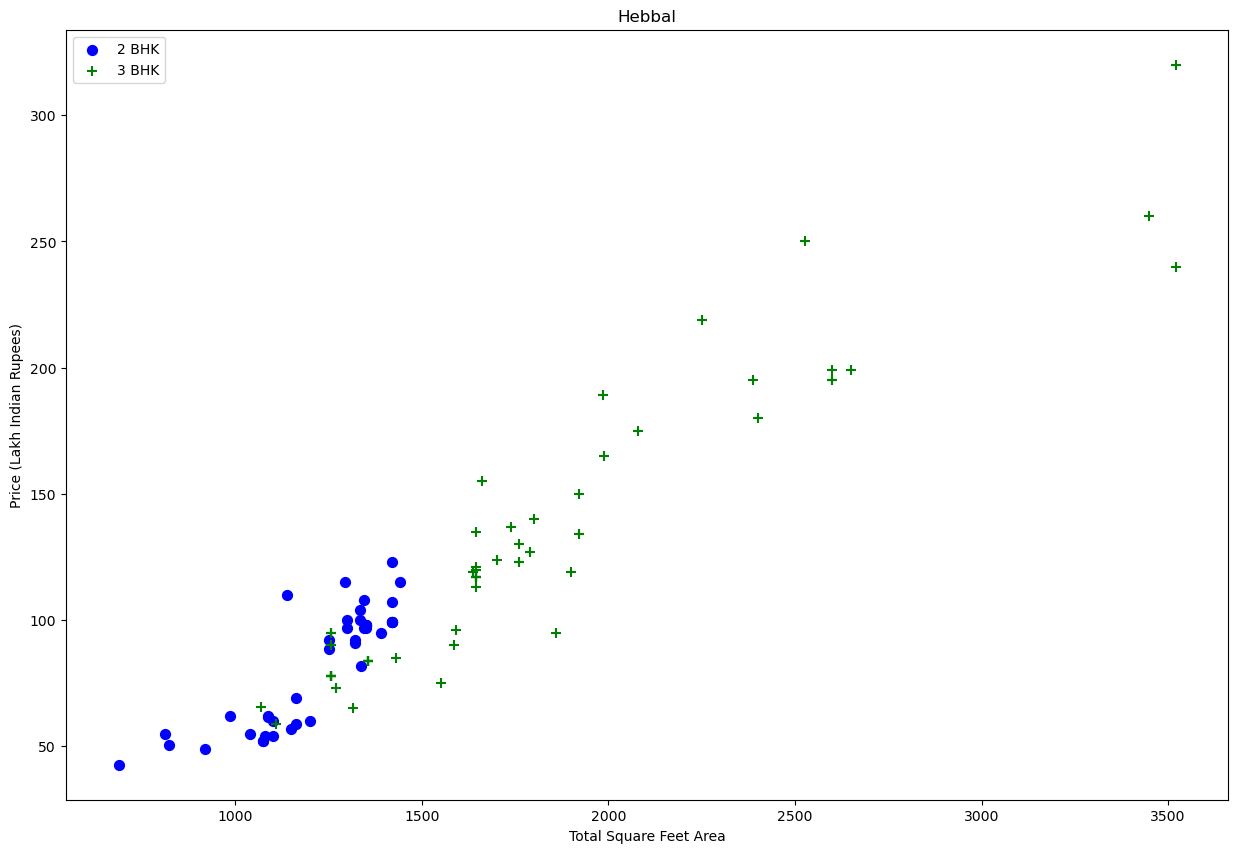

In [34]:
plot_scatter_chart(df7,"Hebbal")

In [35]:
{
    '1':{
        'mean':4000,
        'std':2000,
        'count':34
    },
    '2':{
        'mean':4300,
        'std':2300,
        'count':22
    },
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7509, 7)

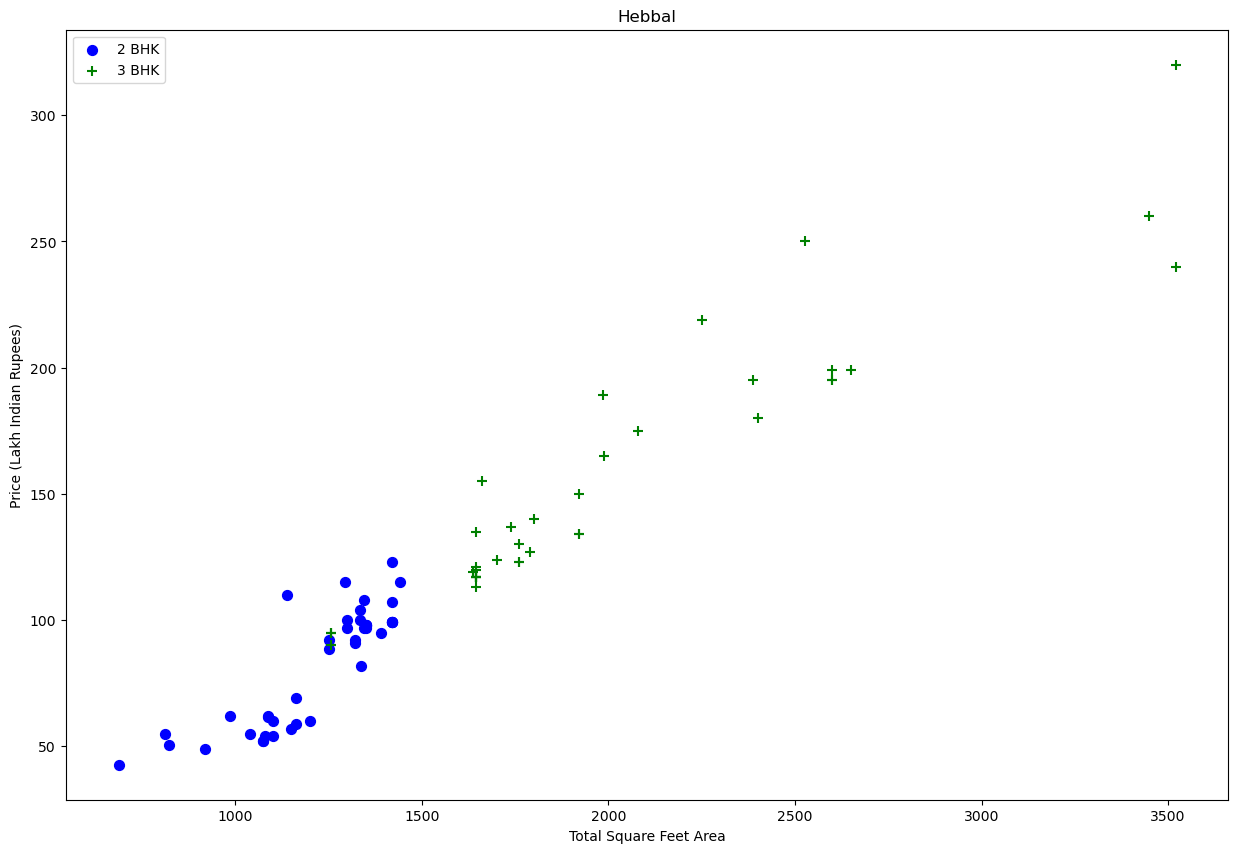

In [37]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

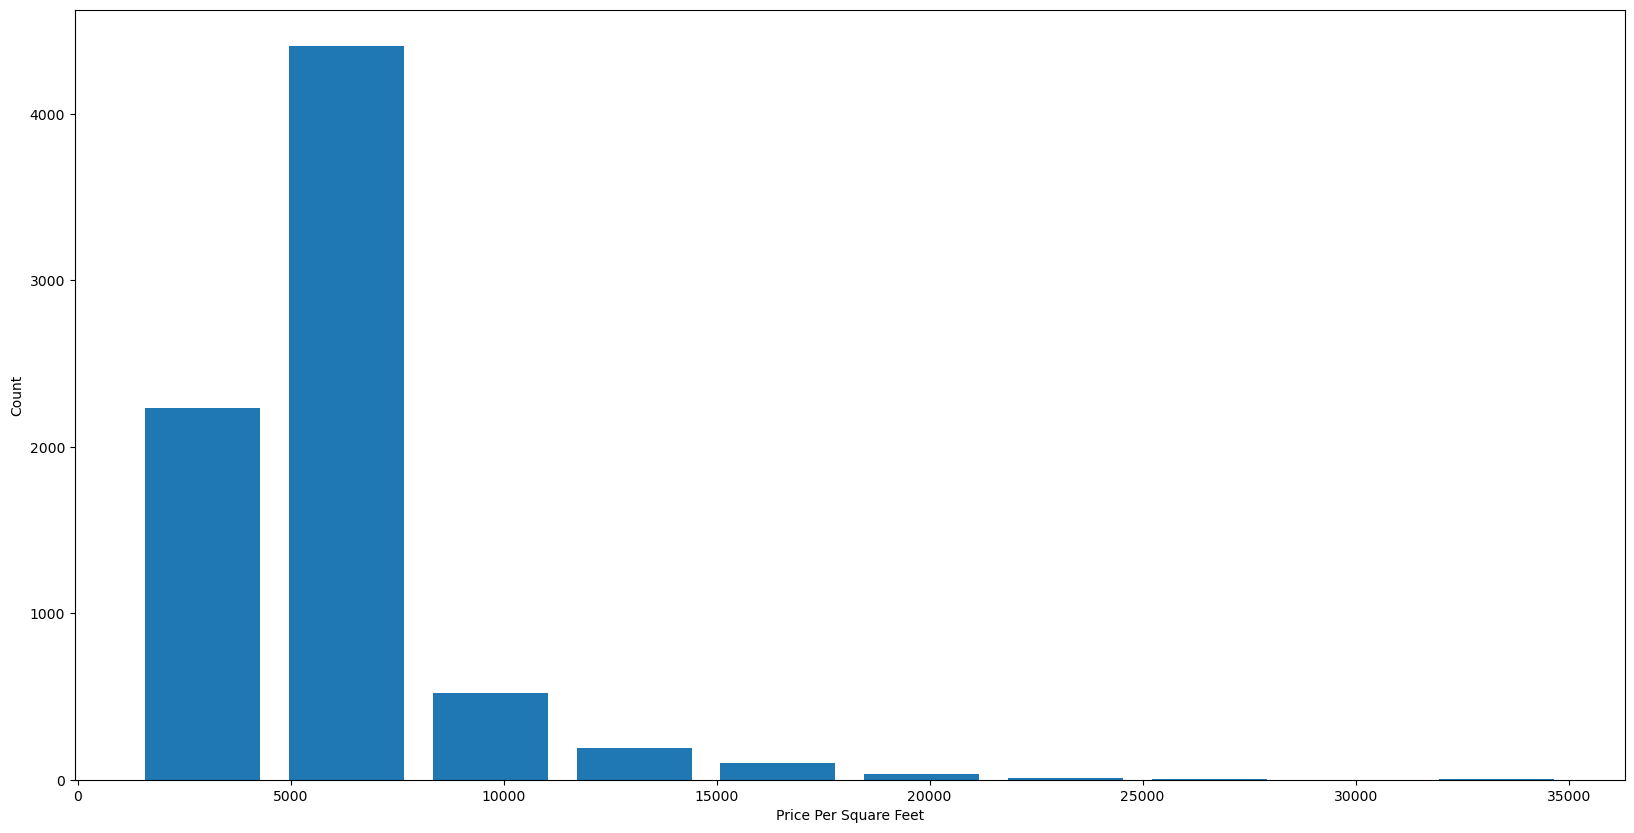

In [38]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df8.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6., 14.,  7., 12.])

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6181,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'count')

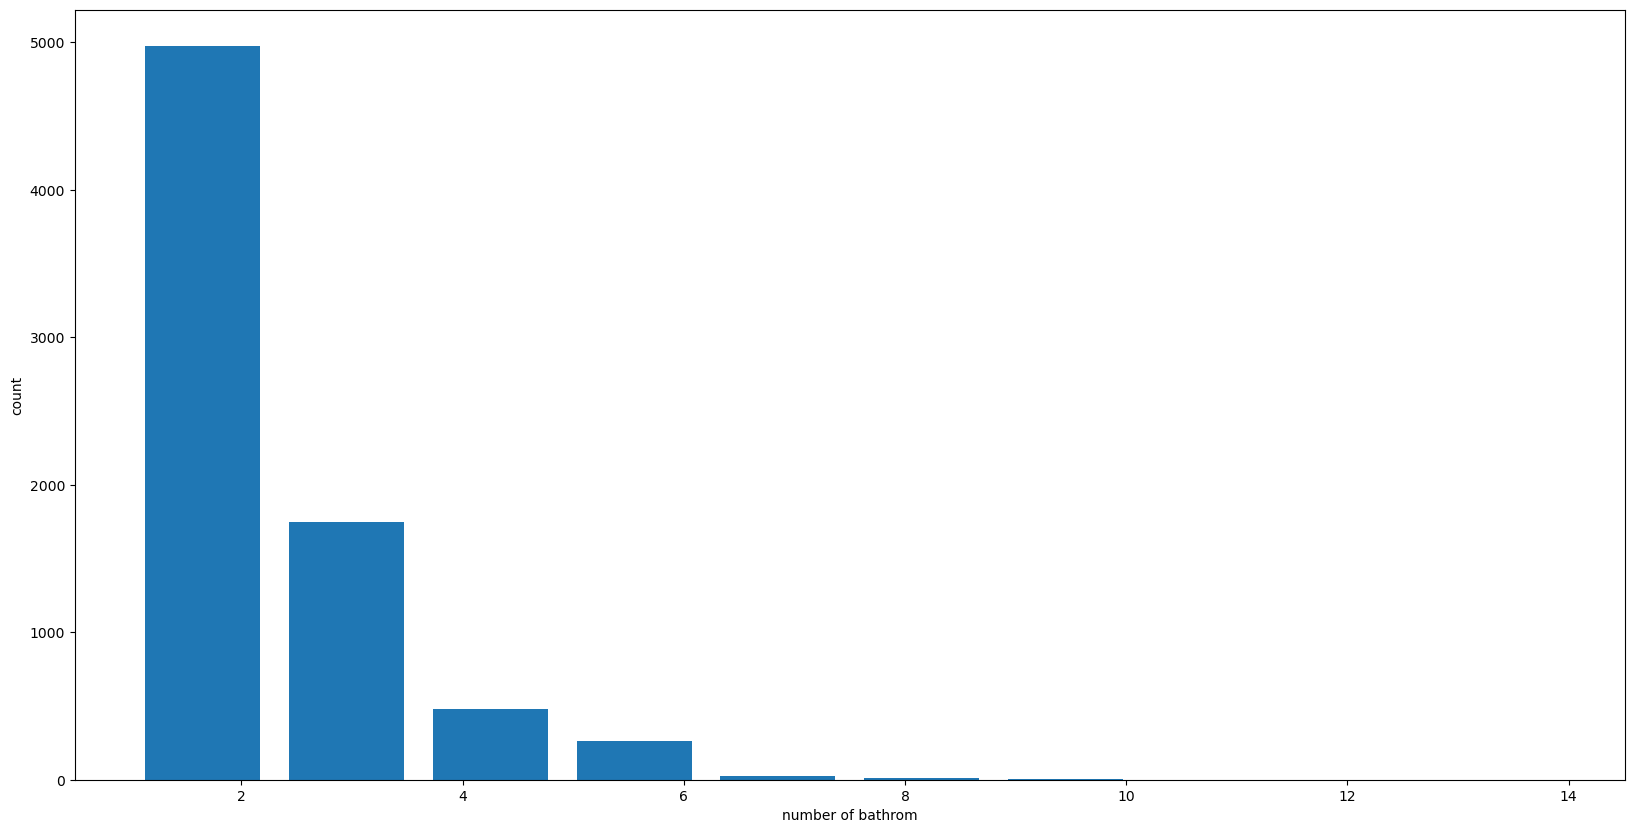

In [45]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("number of bathrom")
plt.ylabel("count")

In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1972,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6115,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7429,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7908,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [47]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7430, 7)

In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3


In [49]:
pd.get_dummies(df10.location)

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
dummies=pd.get_dummies(df10.location)
dummies.head(3)

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12=df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df12.shape

(7430, 768)

In [81]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,1672.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y=df12.price
y.head()

0    150.0
1    149.0
2    150.0
4     40.0
5     83.0
Name: price, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [88]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-736653202324092.5

In [89]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-1.06814948e+14, -2.84238513e+12, -6.03985071e+15, -7.39710154e+16,
       -4.04467298e+14])

In [90]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

,model,best_score,best_params
0,linear_regression,-1.610500e+16,{'normalize': False}
1,lasso,5.859556e-01,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,6.813328e-01,"{'criterion': 'mse', 'splitter': 'best'}"


In [91]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Electronic City', ' Mysore Highway',
       ' Rachenahalli', ' Thanisandra', ' south',
       ...
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yemlur', 'Yeshwanthpur', 'Yeshwanthpur Industrial Suburb',
       'frazertown', 'manyata park', 'tc.palya'],
      dtype='object', length=767)

In [93]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

20

In [97]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]    

In [98]:
predict_price('1st Phase JP Nagar',1000,2,4)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.28544282913208

In [99]:
predict_price('1st Phase JP Nagar',1000,3,3)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.64010715484619

In [101]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


158.59591245651245

In [102]:
predict_price('Indira Nagar',1000,3,3)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


157.28487586975098

In [104]:
import pickle
with open('Bengaluru_House_Data.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [106]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))